# Programming Assignment 1
## Wil Gaboury

In [1]:
# imports
import a_star
import local_search as ls
import matplotlib.pyplot as plt
import pandas as pd
import plotnine as p9
import time
import tsp

## Part 1: Exploring Search Algorithm

In [2]:
def gen_graphs(n):
    result = []
    for i in range(30):
        result.append(tsp.TSPGraph.generate_random(n))
    return result

families = [
    (4, gen_graphs(4)),
    (5, gen_graphs(5)),
    (6, gen_graphs(6)),
    (7, gen_graphs(7)),
    (8, gen_graphs(8)),
    (9, gen_graphs(9)),
    (10, gen_graphs(10)),
    (11, gen_graphs(11)),
    (12, gen_graphs(12))
]

In [3]:
def test_a_star(families, hs):
    df = pd.DataFrame(columns=['n', 'h', 'total_cost', 'node_count', 'cpu_time', 'real_time'])

    for graph_size, family in families:
        for h_name, h_func in hs.items():
            for i, graph in enumerate(family):    
                start_cpu_time = time.process_time()
                start_real_time = time.perf_counter()

                search_result = a_star.a_star(graph.get_start_state_node(), tsp.is_goal, h_func)

                end_cpu_time = time.process_time()
                end_real_time = time.perf_counter()

                path = search_result[0]
                
                df = df.append({
                    'n': graph_size,
                    'h': h_name,
                    'test_num': i,
                    'total_cost': search_result[0].cost(),
                    'node_count': search_result[1], 
                    'cpu_time': end_cpu_time - start_cpu_time,
                    'real_time': end_real_time - start_real_time
                }, ignore_index=True)
    
    df = df.astype({'total_cost': 'int64', 'node_count': 'int64'})
    return df

In [4]:
hs = {
    'uniform_cost': a_star.h_uniform_cost,
    'random_edge': a_star.h_random_edge,
    'smallest_edge': a_star.h_smallest_edge
}
df = test_a_star(families, hs)

df_summary = df.copy()
del df_summary['test_num']
df_summary = df_summary.groupby(['n', 'h']).agg(['mean', 'min', 'max'])
df_summary

total_cost               node_count                cpu_time  \
                        mean  min  max           mean   min     max      mean   
n  h                                                                            
4  random_edge    179.700000   73  284      12.066667     5      17  0.000157   
   smallest_edge  179.700000   73  284      14.833333     8      17  0.000202   
   uniform_cost   179.700000   73  284      15.033333     8      17  0.000144   
5  random_edge    179.900000  111  254      17.300000     7      39  0.000277   
   smallest_edge  175.400000  106  254      37.166667    15      54  0.000639   
   uniform_cost   175.400000  106  254      41.833333    22      57  0.000426   
6  random_edge    204.733333   91  339      21.966667     8      82  0.000432   
   smallest_edge  198.466667   91  339     101.466667    25     202  0.002267   
   uniform_cost   198.466667   91  339     138.133333    68     239  0.001626   
7  random_edge    208.600000   99  309      28.066667     9      70  0.000638   
   smallest_edge  192.666667   76  285     275.466667    48     601  0.008108   
   uniform_cost   192.666667   76  285     442.733333    89     799  0.007745   
8  random_edge    223.500000  156  307      22.033333     9      57  0.000670   
   smallest_edge  188.066667  112  298     672.966667    46    1846  0.028218   
   uniform_cost   188.066667  112  298    1293.966667   201    3321  0.023357   
9  random_edge    260.400000  169  356      35.166667    15      77  0.001186   
   smallest_edge  196.033333  119  296    1901.300000   379    5431  0.103204   
   uniform_cost   196.033333  119  296    4694.300000   749   12636  0.106610   
10 random_edge    275.566667  184  403      32.866667    12      79  0.001330   
   smallest_edge  192.766667  126  311    4369.866667   919   23083  0.309431   
   uniform_cost   192.766667  126  311   15424.233333  2444   51384  0.466331   
11 random_edge    320.100000  147  413      42.033333    15     110  0.001796   
   smallest_edge  201.000000  107  330   10160.633333   734   48065  0.955268   
   uniform_cost   201.000000  107  330   47975.333333  2204  190047  1.855081   
12 random_edge    335.700000  245  433      50.200000    16     240  0.002344   
   smallest_edge  194.633333  110  270   37513.100000  2131  194335  4.271043   
   uniform_cost   194.633333  110  270  153022.033333  8812  542494  7.212283   

                                      real_time                       
                       min        max      mean       min        max  
n  h                                                                  
4  random_edge    0.000081   0.000213  0.000156  0.000080   0.000213  
   smallest_edge  0.000135   0.000224  0.000201  0.000134   0.000227  
   uniform_cost   0.000086   0.000192  0.000142  0.000085   0.000167  
5  random_edge    0.000128   0.000553  0.000277  0.000127   0.000552  
   smallest_edge  0.000311   0.000833  0.000639  0.000310   0.000832  
   uniform_cost   0.000247   0.000565  0.000425  0.000246   0.000564  
6  random_edge    0.000203   0.001323  0.000432  0.000203   0.001327  
   smallest_edge  0.000787   0.003817  0.002269  0.000786   0.003824  
   uniform_cost   0.000875   0.002705  0.001628  0.000878   0.002708  
7  random_edge    0.000263   0.001348  0.000639  0.000263   0.001353  
   smallest_edge  0.001758   0.015112  0.008117  0.001761   0.015133  
   uniform_cost   0.001324   0.051498  0.007756  0.001327   0.051602  
8  random_edge    0.000313   0.001555  0.000670  0.000313   0.001559  
   smallest_edge  0.002581   0.078015  0.028251  0.002580   0.078143  
   uniform_cost   0.003545   0.067183  0.023385  0.003548   0.067303  
9  random_edge    0.000572   0.002461  0.001188  0.000571   0.002484  
   smallest_edge  0.025199   0.281534  0.103523  0.025232   0.281867  
   uniform_cost   0.020604   0.295946  0.106738  0.020645   0.296293  
10 random_edge    0.000632   0.002407  0.001331  0.000631   0.002410  
   smallest_edge  0.07215

In [5]:
df_plot = df.copy()
del df_plot['test_num']
df_plot = df_plot.groupby(['n', 'h']).agg(['mean', 'max', 'min'])

# fixing the nested columns
df_plot.columns = [
    'total_cost_mean',
    'total_cost_max',
    'total_cost_min',
    'node_count_mean',
    'node_count_max',
    'node_count_min',
    'cpu_time_mean',
    'cpu_time_max',
    'cpu_time_min',
    'real_time_mean',
    'real_time_max',
    'real_time_min',
]
df_plot = df_plot.reset_index()

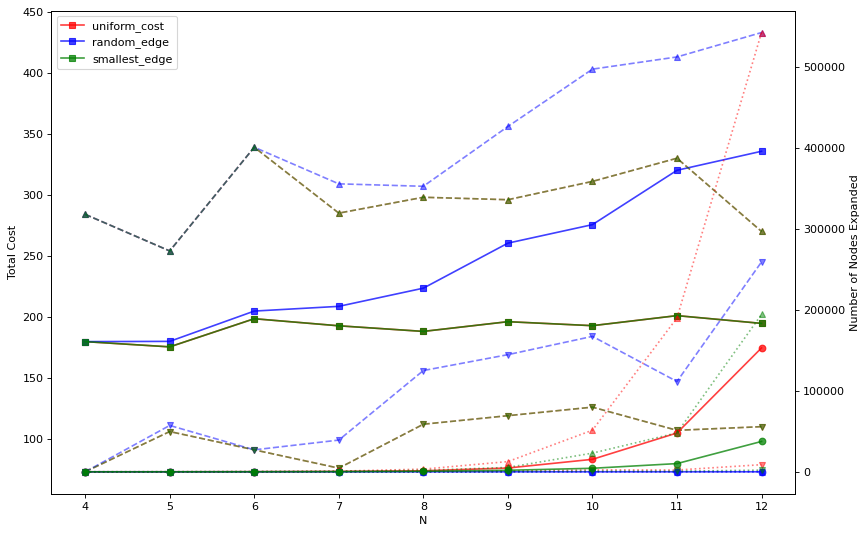

In [6]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 80

fig, ax1 = plt.subplots()
n = list(map(lambda e: e[0], families))

ax1.set_xlabel('N')
ax1.set_ylabel('Total Cost')
for name, color in [('uniform_cost', 'r'), ('random_edge', 'b'), ('smallest_edge', 'g')]:
    ax1.plot(n, df_plot[df_plot.h == name].total_cost_mean, color=color, marker='s', label=name, alpha=0.75)
    ax1.plot(n, df_plot[df_plot.h == name].total_cost_max, color=color, marker='^', linestyle='dashed', alpha=0.5)
    ax1.plot(n, df_plot[df_plot.h == name].total_cost_min, color=color, marker='v', linestyle='dashed', alpha=0.5)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Number of Nodes Expanded')
for name, color in [('uniform_cost', 'r'), ('random_edge', 'b'), ('smallest_edge', 'g')]:
    ax2.plot(n, df_plot[df_plot.h == name].node_count_mean, color=color, marker='o', label=name, alpha=0.75)
    ax2.plot(n, df_plot[df_plot.h == name].node_count_max, color=color, marker='^', linestyle='dotted', alpha=0.5)
    ax2.plot(n, df_plot[df_plot.h == name].node_count_min, color=color, marker='v', linestyle='dotted', alpha=0.5)

plt.show()

In [7]:
# df_time = df_plot.copy()
# df_time = df_time[['n', 'h', 'cpu_time_mean', 'real_time_mean']]
# df_time = pd.melt(df_time, id_vars=['n', 'h'], value_vars=['cpu_time_mean', 'real_time_mean'], 
#         var_name='time_type', value_name='time_mean')
# df_time['h_and_time_type'] = df_time['h'].str.cat(df_time['time_type'], sep=', ')
# (
#     p9.ggplot(df_time, p9.aes(x='n', y='time_mean', color='h_and_time_type'))
#         + p9.geom_line(position=p9.position_dodge2(width=0.75))
#         + p9.labs(y='Mean Time (seconds)')
# )

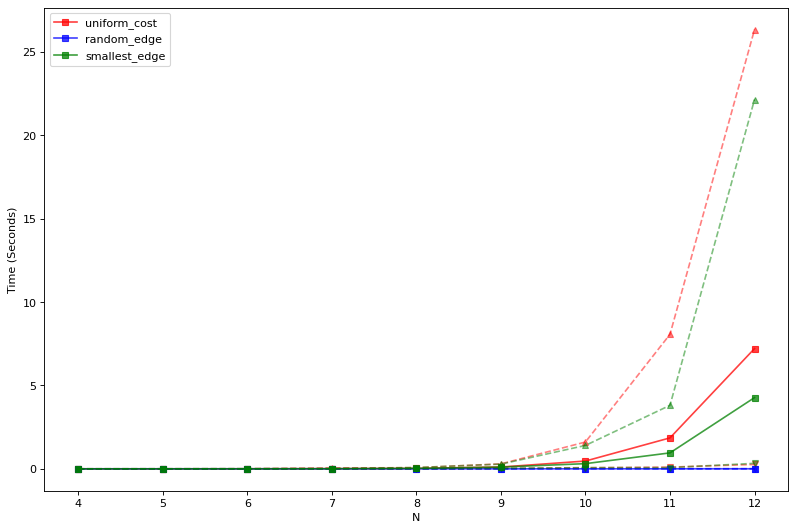

In [8]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 80

fig, ax1 = plt.subplots()
n = list(map(lambda e: e[0], families))

ax1.set_xlabel('N')
ax1.set_ylabel('Time (Seconds)')
for name, color in [('uniform_cost', 'r'), ('random_edge', 'b'), ('smallest_edge', 'g')]:
    ax1.plot(n, df_plot[df_plot.h == name].cpu_time_mean, color=color, marker='s', label=name, alpha=0.75)
    ax1.plot(n, df_plot[df_plot.h == name].cpu_time_max, color=color, marker='^', linestyle='dashed', alpha=0.5)
    ax1.plot(n, df_plot[df_plot.h == name].cpu_time_min, color=color, marker='v', linestyle='dashed', alpha=0.5)
ax1.legend(loc='upper left')

plt.show()

## Part 2: Solve TSP with A* and MST Heuristic

In [9]:
hs = {'mst': a_star.h_mst}
df_mst = test_a_star(families, hs)
df_mst_small = pd.concat([df[df['h'] == 'smallest_edge'], df_mst])

In [10]:
df_summary = df_mst_small.copy()
del df_summary['test_num']
df_summary = df_summary.groupby(['n', 'h']).agg(['mean', 'min', 'max'])
df_summary

total_cost              node_count                cpu_time  \
                        mean  min  max          mean   min     max      mean   
n  h                                                                           
4  mst            179.700000   73  284     13.766667     8      17  0.000308   
   smallest_edge  179.700000   73  284     14.833333     8      17  0.000202   
5  mst            175.400000  106  254     28.466667    11      48  0.000791   
   smallest_edge  175.400000  106  254     37.166667    15      54  0.000639   
6  mst            198.466667   91  339     59.833333    14     138  0.002149   
   smallest_edge  198.466667   91  339    101.466667    25     202  0.002267   
7  mst            192.666667   76  285    117.833333    15     296  0.005697   
   smallest_edge  192.666667   76  285    275.466667    48     601  0.008108   
8  mst            188.066667  112  298    213.466667    20     974  0.013904   
   smallest_edge  188.066667  112  298    672.966667    46    1846  0.028218   
9  mst            196.033333  119  296    441.100000    47    1930  0.038356   
   smallest_edge  196.033333  119  296   1901.300000   379    5431  0.103204   
10 mst            192.766667  126  311    715.500000    76    4544  0.087466   
   smallest_edge  192.766667  126  311   4369.866667   919   23083  0.309431   
11 mst            201.000000  107  330   1186.466667   158    8092  0.205361   
   smallest_edge  201.000000  107  330  10160.633333   734   48065  0.955268   
12 mst            194.633333  110  270   3928.766667   158   17980  0.784090   
   smallest_edge  194.633333  110  270  37513.100000  2131  194335  4.271043   

                                      real_time                       
                       min        max      mean       min        max  
n  h                                                                  
4  mst            0.000212   0.000428  0.000306  0.000211   0.000428  
   smallest_edge  0.000135   0.000224  0.000201  0.000134   0.000227  
5  mst            0.000397   0.001211  0.000793  0.000396   0.001220  
   smallest_edge  0.000311   0.000833  0.000639  0.000310   0.000832  
6  mst            0.000817   0.004139  0.002152  0.000816   0.004145  
   smallest_edge  0.000787   0.003817  0.002269  0.000786   0.003824  
7  mst            0.001194   0.012081  0.005707  0.001193   0.012107  
   smallest_edge  0.001758   0.015112  0.008117  0.001761   0.015133  
8  mst            0.002242   0.046050  0.013925  0.002246   0.046109  
   smallest_edge  0.002581   0.078015  0.028251  0.002580   0.078143  
9  mst            0.008328   0.132565  0.038417  0.008333   0.132767  
   smallest_edge  0.025199   0.281534  0.103523  0.025232   0.281867  
10 mst            0.016021   0.379639  0.087596  0.016039   0.380238  
   smallest_edge  0.072154   1.402163  0.310383  0.072229   1.403835  
11 mst            0.035767   1.057784  0.205797  0.035833   1.059275  
   smallest_edge  0.072877   3.808865  0.956408  0.072978   3.813503  
12 mst            0.053060   3.583904  0.786260  0.053212   3.595243  
   smallest_edge  0.329171  22.147270  4.279545  0.330375  22.208251

In [11]:
df_ratio = df_mst_small.copy()
del df_ratio['test_num']
df_ratio = df_ratio.groupby(['n', 'h']).agg(['mean', 'max', 'min'])

# fixing the nested columns
df_ratio.columns = [
    'total_cost_mean',
    'total_cost_max',
    'total_cost_min',
    'node_count_mean',
    'node_count_max',
    'node_count_min',
    'cpu_time_mean',
    'cpu_time_max',
    'cpu_time_min',
    'real_time_mean',
    'real_time_max',
    'real_time_min',
]
df_ratio = df_ratio.reset_index()

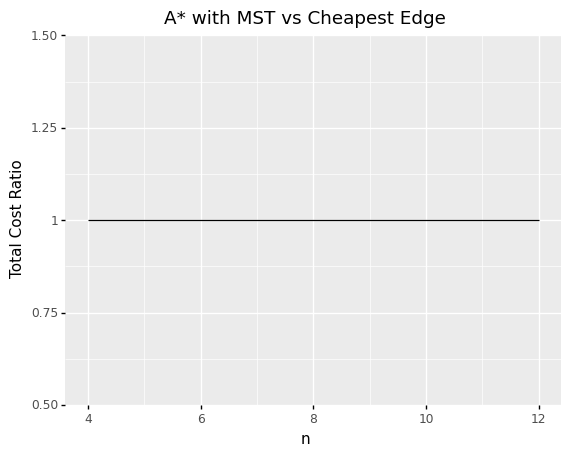

<ggplot: (8736624671844)>

In [12]:
df_cost = df_ratio[['n', 'h', 'total_cost_mean']]
df_cost = df_cost.pivot_table(index=['n'], columns='h', values='total_cost_mean')
df_cost = df_cost.reset_index()
df_cost['ratio'] = df_cost['mst'] / df_cost['smallest_edge']
(
    p9.ggplot(df_cost, p9.aes(x='n', y='ratio'))
        + p9.geom_line()
        + p9.labs(title='A* with MST vs Cheapest Edge', y='Total Cost Ratio')
)

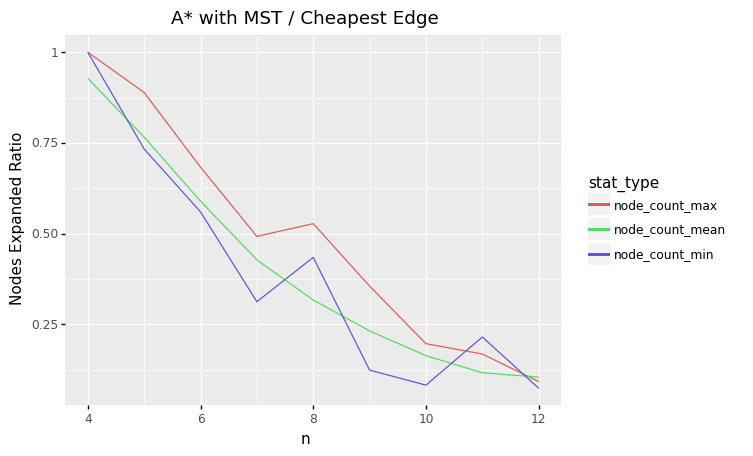

<ggplot: (8736622349581)>

In [13]:
df_count = df_ratio[['n', 'h', 'node_count_mean', 'node_count_max', 'node_count_min']]
df_count = pd.melt(df_count, id_vars=['n', 'h'], 
                   value_vars=['node_count_mean', 'node_count_max', 'node_count_min'], 
                   var_name='stat_type', value_name='stat_value')
df_count = df_count.pivot_table(index=['n', 'stat_type'], columns='h', values='stat_value')
df_count = df_count.reset_index()
df_count['ratio'] = df_count['mst'] / df_count['smallest_edge']
df_count = df_count[['n', 'stat_type', 'ratio']]
# df_count = df_count.pivot_table(index=['n'], columns='stat_type', values='ratio')
(
    p9.ggplot(df_count, p9.aes(x='n', y='ratio', color='stat_type'))
        + p9.geom_line()
        + p9.labs(title='A* with MST / Cheapest Edge', y='Nodes Expanded Ratio')
)
# df_count

In [14]:
# perform difference caluclations

df_diff = df.copy()

df_diff = pd.melt(df_diff, id_vars=['n', 'h', 'test_num'], 
                  value_vars=['total_cost', 'node_count', 'cpu_time', 'real_time'], 
                  var_name='stat_type', value_name='stat_value')

df_mst_diff = df_mst.copy()

df_mst_diff = pd.melt(df_mst_diff, id_vars=['n', 'h', 'test_num'], 
                      value_vars=['total_cost', 'node_count', 'cpu_time', 'real_time'], 
                      var_name='stat_type', value_name='stat_value')

df_diff = df_diff.merge(df_mst_diff, how='left', 
                        left_on=['n', 'test_num', 'stat_type'], 
                        right_on=['n', 'test_num', 'stat_type'])

df_diff['diff'] = df_diff['stat_value_x'] - df_diff['stat_value_y']
df_diff = df_diff[['n', 'test_num', 'h_x', 'stat_type', 'diff']]
df_diff = df_diff.rename(columns={'h_x': 'h'})

df_diff = df_diff.pivot_table(index=['n', 'test_num', 'h'], columns='stat_type', values='diff')
df_diff = df_diff.reset_index()
del df_diff['test_num']
df_diff_summary = df_diff.groupby(['n', 'h']).agg(['mean', 'min', 'max'])
df_diff_summary

cpu_time                          node_count           \
                      mean       min        max           mean      min   
n  h                                                                      
4  random_edge   -0.000151 -0.000293  -0.000076      -1.700000     -8.0   
   smallest_edge -0.000106 -0.000215  -0.000035       1.066667      0.0   
   uniform_cost  -0.000163 -0.000276  -0.000034       1.266667      0.0   
5  random_edge   -0.000514 -0.000892  -0.000154     -11.166667    -33.0   
   smallest_edge -0.000152 -0.000423   0.000075       8.700000      3.0   
   uniform_cost  -0.000365 -0.000676  -0.000121      13.366667      8.0   
6  random_edge   -0.001717 -0.003518  -0.000466     -37.866667   -104.0   
   smallest_edge  0.000117 -0.000541   0.000697      41.633333     11.0   
   uniform_cost  -0.000523 -0.001434   0.000183      78.300000     46.0   
7  random_edge   -0.005059 -0.010733  -0.000820     -89.766667   -286.0   
   smallest_edge  0.002411 -0.000319   0.007609     157.633333     20.0   
   uniform_cost   0.002048 -0.003213   0.045370     324.900000     61.0   
8  random_edge   -0.013234 -0.045527  -0.001469    -191.433333   -953.0   
   smallest_edge  0.014314  0.000339   0.062763     459.500000     26.0   
   uniform_cost   0.009453 -0.008659   0.061472    1080.500000    181.0   
9  random_edge   -0.037171 -0.131850  -0.007408    -405.933333  -1913.0   
   smallest_edge  0.064847  0.010981   0.244173    1460.200000    257.0   
   uniform_cost   0.068253 -0.001042   0.247067    4253.200000    702.0   
10 random_edge   -0.086136 -0.378632  -0.014274    -682.633333  -4511.0   
   smallest_edge  0.221965  0.032489   1.022524    3654.366667    781.0   
   uniform_cost   0.378865  0.042556   1.227567   14708.733333   2354.0   
11 random_edge   -0.203565 -1.056313  -0.034832   -1144.433333  -8057.0   
   smallest_edge  0.749907  0.037110   2.751081    8974.166667    566.0   
   uniform_cost   1.649720  0.067270   7.884606   46788.866667   2036.0   
12 random_edge   -0.781747 -3.580768  -0.050944   -3878.566667 -17889.0   
   smallest_edge  3.486952  0.244130  19.382514   33584.333333   1940.0   
   uniform_cost   6.428193  0.207987  23.581508  149093.266667   8654.0   

                           real_time                       total_cost        \
                       max      mean       min        max        mean   min   
n  h                                                                          
4  random_edge         2.0 -0.000150 -0.000294  -0.000076    0.000000   0.0   
   smallest_edge       4.0 -0.000105 -0.000215  -0.000035    0.000000   0.0   
   uniform_cost        4.0 -0.000164 -0.000276  -0.000093    0.000000   0.0   
5  random_edge         4.0 -0.000517 -0.000900  -0.000155    4.500000   0.0   
   smallest_edge      16.0 -0.000154 -0.000433   0.000075    0.000000   0.0   
   uniform_cost       25.0 -0.000368 -0.000686  -0.000121    0.000000   0.0   
6  random_edge        10.0 -0.001721 -0.003528  -0.000466    6.266667   0.0   
   smallest_edge      64.0  0.000117 -0.000547   0.000697    0.000000   0.0   
   uniform_cost      105.0 -0.000525 -0.001436   0.000183    0.000000   0.0   
7  random_edge        -3.0 -0.005068 -0.010754  -0.000820   15.933333   0.0   
   smallest_edge     380.0  0.002410 -0.000315   0.007609    0.000000   0.0   
   uniform_cost      583.0  0.002049 -0.003226   0.045461    0.000000   0.0   
8  random_edge         2.0 -0.013255 -0.045584  -0.001473   35.433333   0.0   
   smallest_edge    1355.0  0.014326  0.000334   0.062869    0.000000   0.0   
   uniform_cost     2790.0  0.009460 -0.008680   0.061588    0.000000   0.0   
9  random_edge       -19.0 -0.037229 -0.132048  -0.007435   64.366667   9.0   
   smallest_edge    5110.0  0.065106  0.011133   0.244455    0.000000   0.0   
   uniform_cost    12021.0  0.068321 -0.001050   0.247358    0.000000   0.0   
10 random_edge       -28.0 -0.086265 -0.379226  -0.014293   82.800000  19.0   
   smallest_edge   18539.0  0

The above is a table of the mean/min/max of the differences between each catagory in the original test and the values of the mst test

In [15]:
# prepping plot dataframe
df_plot = df_diff.groupby(['n', 'h']).agg(['mean', 'max', 'min'])
df_plot.columns = [
    'cpu_time_mean',
    'cpu_time_max',
    'cpu_time_min',
    'node_count_mean',
    'node_count_max',
    'node_count_min',
    'real_time_mean',
    'real_time_max',
    'real_time_min',
    'total_cost_mean',
    'total_cost_max',
    'total_cost_min',
]
df_plot = df_plot.reset_index()
df_plot

,n,h,cpu_time_mean,cpu_time_max,cpu_time_min,node_count_mean,node_count_max,node_count_min,real_time_mean,real_time_max,real_time_min,total_cost_mean,total_cost_max,total_cost_min
0,4,random_edge,-0.000151,-0.000076,-0.000293,-1.700000,2.0,-8.0,-0.000150,-0.000076,-0.000294,0.000000,0.0,0.0
1,4,smallest_edge,-0.000106,-0.000035,-0.000215,1.066667,4.0,0.0,-0.000105,-0.000035,-0.000215,0.000000,0.0,0.0
2,4,uniform_cost,-0.000163,-0.000034,-0.000276,1.266667,4.0,0.0,-0.000164,-0.000093,-0.000276,0.000000,0.0,0.0
3,5,random_edge,-0.000514,-0.000154,-0.000892,-11.166667,4.0,-33.0,-0.000517,-0.000155,-0.000900,4.500000,46.0,0.0
4,5,smallest_edge,-0.000152,0.000075,-0.000423,8.700000,16.0,3.0,-0.000154,0.000075,-0.000433,0.000000,0.0,0.0
5,5,uniform_cost,-0.000365,-0.000121,-0.000676,13.366667,25.0,8.0,-0.000368,-0.000121,-0.000686,0.000000,0.0,0.0
6,6,random_edge,-0.001717,-0.000466,-0.003518,-37.866667,10.0,-104.0,-0.001721,-0.000466,-0.003528,6.266667,68.0,0.0
7,6,smallest_edge,0.000117,0.000697,-0.000541,41.633333,64.0,11.0,0.000117,0.000697,-0.000547,0.000000,0.0,0.0
8,6,uniform_cost,-0.000523,0.000183,-0.001434,78.300000,105.0,46.0,-0.000525,0.000183,-0.001436,0.000000,0.0,0.0
9,7,random_edge,-0.005059,-0.000820,-0.010733,-89.766667,-3.0,-286.0,-0.005068,-0.000820,-0.010754,15.933333,63.0,0.0


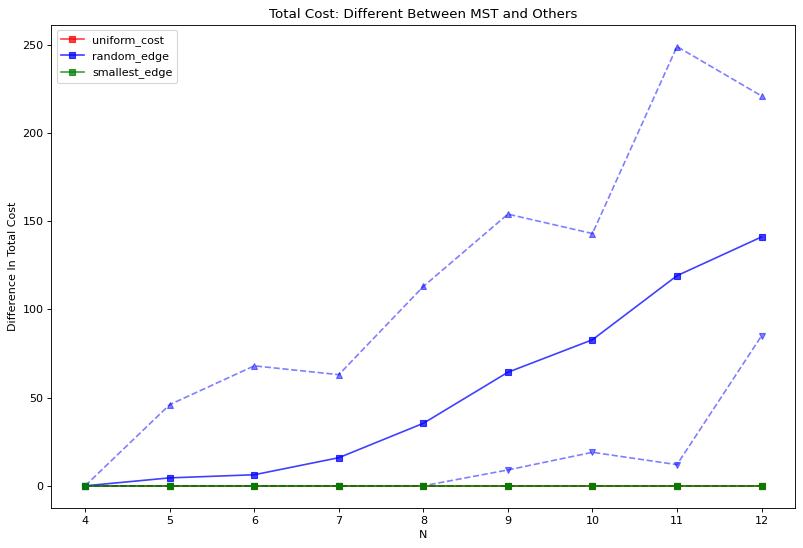

In [16]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 80

fig, ax1 = plt.subplots()
n = list(map(lambda e: e[0], families))

ax1.set_xlabel('N')
ax1.set_ylabel('Difference In Total Cost')
for name, color in [('uniform_cost', 'r'), ('random_edge', 'b'), ('smallest_edge', 'g')]:
    ax1.plot(n, df_plot[df_plot.h == name].total_cost_mean, color=color, marker='s', label=name, alpha=0.75)
    ax1.plot(n, df_plot[df_plot.h == name].total_cost_max, color=color, marker='^', linestyle='dashed', alpha=0.5)
    ax1.plot(n, df_plot[df_plot.h == name].total_cost_min, color=color, marker='v', linestyle='dashed', alpha=0.5)
ax1.legend(loc='upper left')
plt.title('Total Cost: Different Between MST and Others')
plt.show()

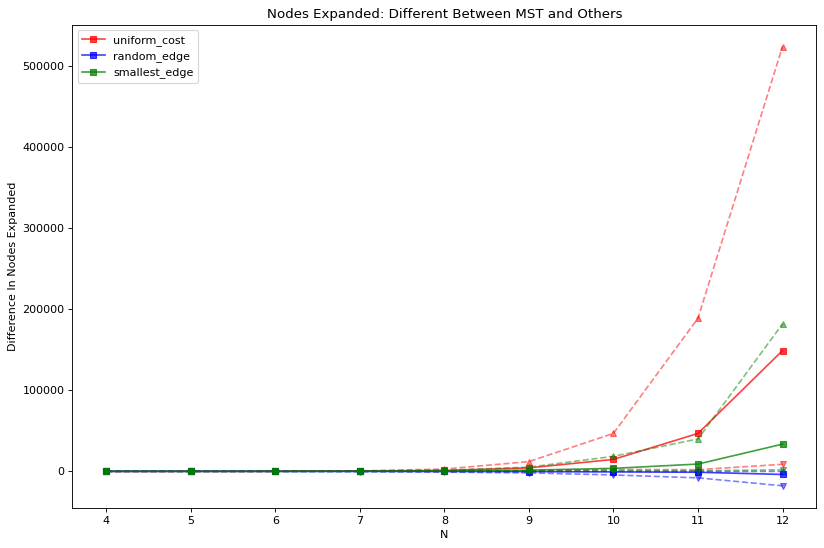

In [17]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 80

fig, ax1 = plt.subplots()
n = list(map(lambda e: e[0], families))

ax1.set_xlabel('N')
ax1.set_ylabel('Difference In Nodes Expanded')
for name, color in [('uniform_cost', 'r'), ('random_edge', 'b'), ('smallest_edge', 'g')]:
    ax1.plot(n, df_plot[df_plot.h == name].node_count_mean, color=color, marker='s', label=name, alpha=0.75)
    ax1.plot(n, df_plot[df_plot.h == name].node_count_max, color=color, marker='^', linestyle='dashed', alpha=0.5)
    ax1.plot(n, df_plot[df_plot.h == name].node_count_min, color=color, marker='v', linestyle='dashed', alpha=0.5)
ax1.legend(loc='upper left')
plt.title('Nodes Expanded: Different Between MST and Others')
plt.show()

## Part 3: Explore Local Search Algorithm

In [18]:
def test_local_search_alg(families, funcs):
    df = pd.DataFrame(columns=['n', 'search_type', 'total_cost', 'cpu_time', 'real_time'])

    for graph_size, family in families:
        for func_name, func in funcs.items():
            for i, graph in enumerate(family):
                start_cpu_time = time.process_time()
                start_real_time = time.perf_counter()

                search_result = func(graph)

                end_cpu_time = time.process_time()
                end_real_time = time.perf_counter()
                
                df = df.append({
                    'n': graph_size,
                    'search_type': func_name,
                    'test_num': i,
                    'total_cost': tsp.path_cost(search_result, graph),
                    'cpu_time': end_cpu_time - start_cpu_time,
                    'real_time': end_real_time - start_real_time
                }, ignore_index=True)
    
    df = df.astype({'total_cost': 'int64'})
    return df

In [19]:
families = [
    (4, gen_graphs(4)),
    (5, gen_graphs(5)),
    (6, gen_graphs(6)),
    (7, gen_graphs(7)),
    (8, gen_graphs(8)),
    (9, gen_graphs(9)),
    (10, gen_graphs(10)),
    (11, gen_graphs(11)),
    (12, gen_graphs(12)),
]

In [20]:
# contants for algorithms

hill_climbing_restarts = 500

simulated_annealing_iterations = 1000
simulated_annealing_cooling_factor = 0.995

genetic_alg_iterations = 200
genetic_alg_population_size = 200
genetic_alg_mutation_factor = 0.5

In [21]:
funcs = {
    'hill_climbing': lambda g: ls.hillClimbing(g, hill_climbing_restarts),
    'simulated_annealing': lambda g: ls.simuAnnealing(g, simulated_annealing_iterations, simulated_annealing_cooling_factor),
    'genetic_algorithm': lambda g: ls.genetic(g, genetic_alg_iterations, genetic_alg_population_size, genetic_alg_mutation_factor)
}

In [22]:
df = test_local_search_alg(families, funcs)
df_mst = test_a_star(families, { 'mst': a_star.h_mst })
del df_mst['node_count']
df_mst = df_mst.rename(columns={'h': 'search_type'})
df_comb = df.append(df_mst, ignore_index=True)

df_summary = df_comb.copy();
del df_summary['test_num']
df_summary.groupby(['n', 'search_type']).agg(['mean', 'max', 'min'])

total_cost            cpu_time                      \
                              mean  max  min      mean       max       min   
n  search_type                                                               
4  genetic_algorithm    168.633333  253   90  0.156828  0.166707  0.154345   
   hill_climbing        168.633333  253   90  0.007963  0.008360  0.007687   
   mst                  168.633333  253   90  0.000289  0.000365  0.000208   
   simulated_annealing  168.633333  253   90  0.009132  0.009523  0.008857   
5  genetic_algorithm    170.466667  309   48  0.171158  0.181467  0.168373   
   hill_climbing        170.466667  309   48  0.010644  0.012170  0.010306   
   mst                  170.466667  309   48  0.000841  0.001403  0.000385   
   simulated_annealing  170.466667  309   48  0.009806  0.010144  0.009501   
6  genetic_algorithm    175.733333  249  111  0.186182  0.198894  0.182590   
   hill_climbing        175.366667  249  111  0.013267  0.013739  0.012840   
   mst                  175.366667  249  111  0.001863  0.003772  0.000891   
   simulated_annealing  175.400000  249  111  0.011085  0.017472  0.010300   
7  genetic_algorithm    214.000000  341   96  0.196544  0.209645  0.193389   
   hill_climbing        202.533333  322   84  0.016243  0.016638  0.015839   
   mst                  202.366667  322   84  0.006563  0.015277  0.001428   
   simulated_annealing  202.366667  322   84  0.011181  0.012211  0.010736   
8  genetic_algorithm    234.100000  348  149  0.213768  0.229892  0.210613   
   hill_climbing        220.933333  337  141  0.019321  0.020053  0.018726   
   mst                  202.666667  315  140  0.019755  0.072200  0.006121   
   simulated_annealing  203.100000  315  140  0.011658  0.012000  0.011302   
9  genetic_algorithm    270.333333  369  190  0.224295  0.231035  0.221768   
   hill_climbing        249.366667  370  138  0.022674  0.023747  0.021981   
   mst                  191.200000  315   96  0.031587  0.115305  0.004605   
   simulated_annealing  191.200000  315   96  0.012233  0.013251  0.012023   
10 genetic_algorithm    303.300000  409  201  0.240708  0.247869  0.237017   
   hill_climbing        281.933333  375  196  0.026535  0.028045  0.026011   
   mst                  214.666667  329  140  0.154425  0.755952  0.024240   
   simulated_annealing  217.800000  331  140  0.012816  0.013049  0.012550   
11 genetic_algorithm    327.633333  418  211  0.253435  0.270633  0.248427   
   hill_climbing        290.766667  388  146  0.030806  0.031672  0.030363   
   mst                  188.000000  265   94  0.164761  0.481740  0.018032   
   simulated_annealing  191.066667  265  101  0.013412  0.014172  0.013072   
12 genetic_algorithm    373.866667  469  257  0.266245  0.271892  0.262461   
   hill_climbing        339.200000  432  242  0.035282  0.036457  0.034542   
   mst                  204.133333  309  134  0.684193  3.221464  0.050804   
   simulated_annealing  211.266667  321  134  0.014030  0.014250  0.013708   

                       real_time                      
                            mean       max       min  
n  search_type                                        
4  genetic_algorithm    0.157488  0.168011  0.154697  
   hill_climbing        0.008023  0.008435  0.007783  
   mst                  0.000289  0.000364  0.000207  
   simulated_annealing  0.009202  0.009535  0.008901  
5  genetic_algorithm    0.171465  0.181727  0.168553  
   hill_climbing        0.010670  0.012186  0.010353  
   mst                  0.000842  0.001403  0.000385  
   simulated_annealing  0.009832  0.010174  0.009529  
6  genetic_algorithm    0.186613  0.199488  0.182794  
   hill_climbing        0.013304  0.013799  0.012861  
   mst                  0.001869  0.003776  0.000890  
   simulated_annealing  0.011120  0.017554  0.010312  
7  genetic_algorithm    0.196839  0.210211  0.193642  
   hill_climbing        0.016268  0.016653  0.015873  
   mst                  0.006588  0.015363  0.

In [23]:
df_plot = df_comb.copy()
del df_plot['test_num']
df_plot = df_plot.groupby(['n', 'search_type']).agg(['mean'])
df_plot.columns = [
    'total_cost_mean', 
    'cpu_time_mean',
    'real_time_mean',
]
df_plot = df_plot.reset_index()

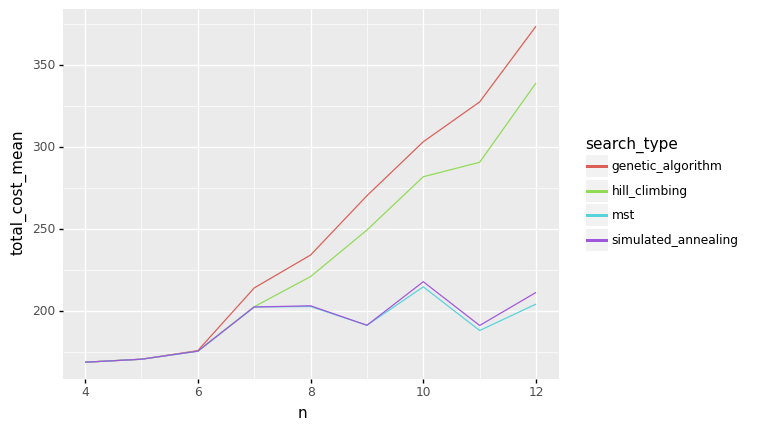

<ggplot: (8736624319091)>

In [24]:
(
    p9.ggplot(df_plot, p9.aes(x='n', y='total_cost_mean', color='search_type'))
        + p9.geom_line()
)

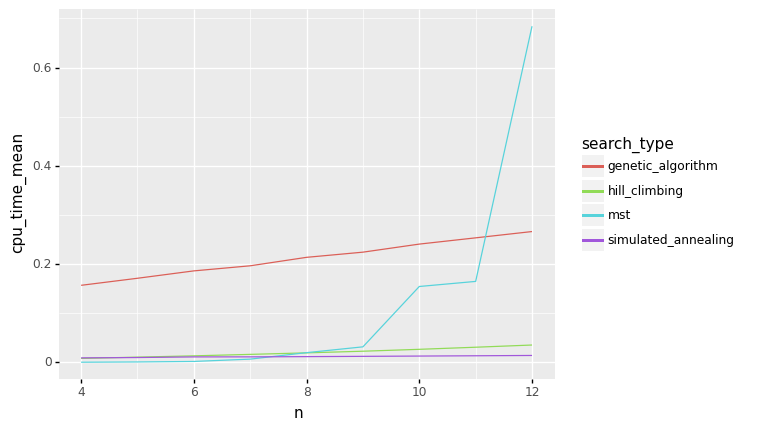

<ggplot: (8736624766498)>

In [25]:
(
    p9.ggplot(df_plot, p9.aes(x='n', y='cpu_time_mean', color='search_type'))
        + p9.geom_line()
)

In [26]:
#perform difference caluclations
df_diff = df.copy()
df_diff = df_diff[['n', 'test_num', 'search_type', 'total_cost', 'cpu_time']]

df_mst_diff = df_mst.copy()
df_mst_diff = df_mst_diff[['n', 'test_num', 'search_type', 'total_cost', 'cpu_time']]

df_diff = df_diff.merge(df_mst_diff, how='left', 
                        left_on=['n', 'test_num'], 
                        right_on=['n', 'test_num'])

df_diff['diff'] = df_diff['total_cost_x'] - df_diff['total_cost_y']
df_diff = df_diff[['n', 'search_type_x', 'diff', 'cpu_time_x']]
df_diff = df_diff.rename(columns={'search_type_x': 'search_type', 'cpu_time_x': 'cpu_time'})

df_diff_summary = df_diff.groupby(['n', 'search_type']).agg(['mean', 'min', 'max'])
df_diff_summary

diff           cpu_time                    
                              mean min  max      mean       min       max
n  search_type                                                           
4  genetic_algorithm      0.000000   0    0  0.156828  0.154345  0.166707
   hill_climbing          0.000000   0    0  0.007963  0.007687  0.008360
   simulated_annealing    0.000000   0    0  0.009132  0.008857  0.009523
5  genetic_algorithm      0.000000   0    0  0.171158  0.168373  0.181467
   hill_climbing          0.000000   0    0  0.010644  0.010306  0.012170
   simulated_annealing    0.000000   0    0  0.009806  0.009501  0.010144
6  genetic_algorithm      0.366667   0   11  0.186182  0.182590  0.198894
   hill_climbing          0.000000   0    0  0.013267  0.012840  0.013739
   simulated_annealing    0.033333   0    1  0.011085  0.010300  0.017472
7  genetic_algorithm     11.633333   0   57  0.196544  0.193389  0.209645
   hill_climbing          0.166667   0    5  0.016243  0.015839  0.016638
   simulated_annealing    0.000000   0    0  0.011181  0.010736  0.012211
8  genetic_algorithm     31.433333   0   63  0.213768  0.210613  0.229892
   hill_climbing         18.266667   0   49  0.019321  0.018726  0.020053
   simulated_annealing    0.433333   0    8  0.011658  0.011302  0.012000
9  genetic_algorithm     79.133333  15  159  0.224295  0.221768  0.231035
   hill_climbing         58.166667   0  126  0.022674  0.021981  0.023747
   simulated_annealing    0.000000   0    0  0.012233  0.012023  0.013251
10 genetic_algorithm     88.633333  29  162  0.240708  0.237017  0.247869
   hill_climbing         67.266667  20  124  0.026535  0.026011  0.028045
   simulated_annealing    3.133333   0   24  0.012816  0.012550  0.013049
11 genetic_algorithm    139.633333  70  191  0.253435  0.248427  0.270633
   hill_climbing        102.766667  30  164  0.030806  0.030363  0.031672
   simulated_annealing    3.066667   0   21  0.013412  0.013072  0.014172
12 genetic_algorithm    169.733333  66  231  0.266245  0.262461  0.271892
   hill_climbing        135.066667  79  215  0.035282  0.034542  0.036457
   simulated_annealing    7.133333   0   38  0.014030  0.013708  0.014250

In [27]:
df_diff_summary.columns = ['diff_mean', 'diff_min', 'diff_max', 'cpu_time_mean', 'cpu_time_min', 'cpu_time_max']
df_diff_summary = df_diff_summary.reset_index()
df_diff_summary = df_diff_summary.drop(['cpu_time_min', 'cpu_time_max'], axis=1)
df_diff_summary = pd.melt(df_diff_summary, id_vars=['n', 'search_type', 'cpu_time_mean'], 
                          value_vars=['diff_mean', 'diff_min', 'diff_max'], 
                          var_name='diff_type', value_name='diff_value')

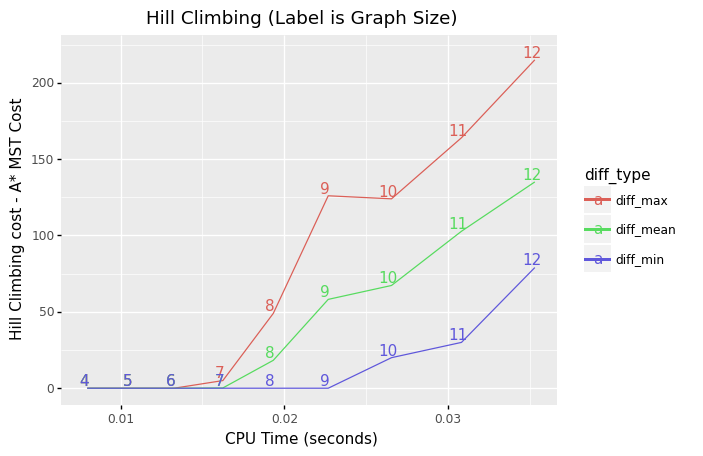

<ggplot: (8736624319067)>

In [28]:
(
    p9.ggplot(df_diff_summary[df_diff_summary['search_type'] == 'hill_climbing'], 
              p9.aes(x='cpu_time_mean', y='diff_value', color='diff_type'))
        + p9.geom_line()
        + p9.geom_text(p9.aes(label='n'), nudge_x=-.0002, nudge_y=5)
        + p9.labs(title='Hill Climbing (Label is Graph Size)', x='CPU Time (seconds)', y='Hill Climbing cost - A* MST Cost')
)

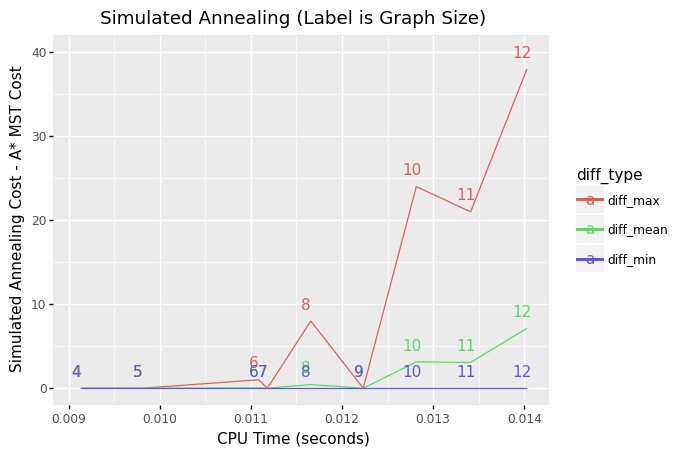

<ggplot: (8736621443479)>

In [29]:
(
    p9.ggplot(df_diff_summary[df_diff_summary['search_type'] == 'simulated_annealing'], 
              p9.aes(x='cpu_time_mean', y='diff_value', color='diff_type'))
        + p9.geom_line()
        + p9.geom_text(p9.aes(label='n'), nudge_x=-.00005, nudge_y=2)
        + p9.labs(title='Simulated Annealing (Label is Graph Size)', x='CPU Time (seconds)', y='Simulated Annealing Cost - A* MST Cost')
)

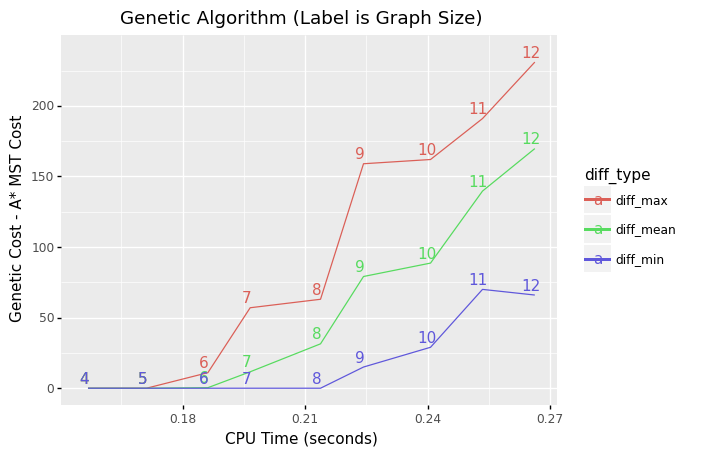

<ggplot: (8736619383158)>

In [30]:
(
    p9.ggplot(df_diff_summary[df_diff_summary['search_type'] == 'genetic_algorithm'], 
              p9.aes(x='cpu_time_mean', y='diff_value', color='diff_type'))
        + p9.geom_line()
        + p9.geom_text(p9.aes(label='n'), nudge_x=-.001, nudge_y=7)
        + p9.labs(title='Genetic Algorithm (Label is Graph Size)', x='CPU Time (seconds)', y='Genetic Cost - A* MST Cost')
)